<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/FoodImagesClassification_CV_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context
- Train a convolution Neural Network to classify images of Vegetables, soup or bread correctly.

## Dataset
- This is provided in a zipped file format already split into training and test data sets. Each folder has 3subfolders named 'Bread', 'Soup' and 'Vegetable- Fruits'.
- These folders have images of the respective classes.

**Mount the drive of the source of data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the supporting Libraries**

In [50]:
#Libraries to support data handling
import numpy as np
import pandas as pd
#Libraries to support visualization and graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

#For metrics calculation and analysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#Import Tensor flow and Keras
import tensorflow as tf
import keras

#APIs fro sequential and model
from tensorflow.keras.models import Sequential, Model

#Import different NN layer modules
from tensorflow.keras.layers import Dense, Input, Activation, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten
from tensorflow.keras import backend, losses, optimizers

#To perform one-hot encoding
from tensorflow.keras.utils import to_categorical

#Import Label Binarizer to help with varibale encoding
from sklearn.preprocessing import LabelBinarizer

#Optimizers for optimizng the model
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

#Regularition methods to prevent over fitting
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#For loading images using the load_img function
from keras.preprocessing.image import load_img

#Import the CV modules
import cv2
from google.colab.patches import cv2_imshow
#Import OS
import os

**Unzip and Inflate the Image Files stored in a zipped format**

In [4]:
!unzip "/content/drive/MyDrive/Food_Case_Study/Food_Data.zip"

Archive:  /content/drive/MyDrive/Food_Case_Study/Food_Data.zip
replace Food_Data/Testing/Bread/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Food_Data/Testing/Bread/0.jpg  
  inflating: Food_Data/Testing/Bread/1.jpg  
  inflating: Food_Data/Testing/Bread/10.jpg  
  inflating: Food_Data/Testing/Bread/100.jpg  
  inflating: Food_Data/Testing/Bread/101.jpg  
  inflating: Food_Data/Testing/Bread/102.jpg  
  inflating: Food_Data/Testing/Bread/103.jpg  
  inflating: Food_Data/Testing/Bread/104.jpg  
  inflating: Food_Data/Testing/Bread/105.jpg  
  inflating: Food_Data/Testing/Bread/106.jpg  
  inflating: Food_Data/Testing/Bread/107.jpg  
  inflating: Food_Data/Testing/Bread/108.jpg  
  inflating: Food_Data/Testing/Bread/109.jpg  
  inflating: Food_Data/Testing/Bread/11.jpg  
  inflating: Food_Data/Testing/Bread/110.jpg  
  inflating: Food_Data/Testing/Bread/111.jpg  
  inflating: Food_Data/Testing/Bread/112.jpg  
  inflating: Food_Data/Testing/Bread/113.jpg  
  inflating: Food_

### Reading the training data after unzipping

In [5]:
#Store the training path in a variable named DATADIR, and store the unique categories in a list
DATADIR = '/content/Food_Data/Training'                          #Path of training data after unzipping
CATEGORIES = ['Bread', 'Soup', 'Vegetable-Fruit']               #Storing the unique category variable
IMG_SIZE = 150                                                  #Define the size of the images

In [6]:
#Create a function to extract images from the directory
training_data = []                                            #Create an empty list to store all the training images
def create_training_data():
  for category in CATEGORIES:                                #Loop over each category
    path = os.path.join(DATADIR, category)                   #Joining images with their labels
    class_num = category
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))         #Reading the images
      new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))  #Resizing the images
      training_data.append([new_array, class_num])            #Appending both images and labels to the list created at the top

create_training_data()

### Reading the testing data after unzipping

In [7]:
#Store the training path in a variable named DATADIR, and store the unique categories in a list
DATADIR = '/content/Food_Data/Testing'                          #Path of training data after unzipping
CATEGORIES = ['Bread', 'Soup', 'Vegetable-Fruit']               #Storing the unique category variable
IMG_SIZE = 150                                                  #Define the size of the images

In [8]:
#Create a function to extract images from the directory
testing_data = []                                            #Create an empty list to store all the training images
def create_testing_data():
  for category in CATEGORIES:                                #Loop over each category
    path = os.path.join(DATADIR, category)                   #Joining images with their labels
    class_num = category
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))         #Reading the images
      new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))  #Resizing the images
      testing_data.append([new_array, class_num])            #Appending both images and labels to the list created at the top

create_testing_data()

**Visualize random images from each of the three categories**

In [9]:
#Create three different lists to store images from the respective directories
bread_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}')]
soup_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]
veg_fruit_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}')]

select_bread = np.random.choice(bread_imgs, 3, replace = False)
select_soup = np.random.choice(soup_imgs, 3, replace = False)
select_veg_fruit = np.random.choice(veg_fruit_imgs, 3, replace = False)


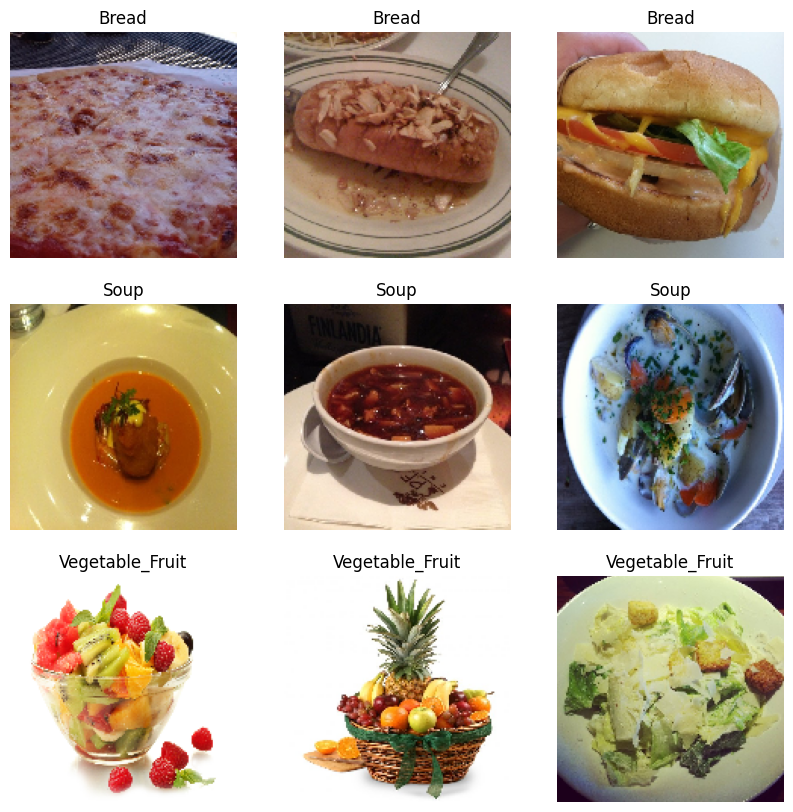

In [10]:
#Plot the 3 by 3 matrix to display your images
fig = plt.figure(figsize =(10,10))

#Loop through the directories and display the  above random images

for i in range(9):
  if i < 3:
    fp = f'{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}'
    label = 'Bread'
  if i>=3 and i < 6:
    fp = f'{DATADIR}/{CATEGORIES[1]}/{select_soup[i-3]}'
    label = 'Soup'
  if i>=6 and i < 9:
    fp = f'{DATADIR}/{CATEGORIES[2]}/{select_veg_fruit[i-6]}'
    label = 'Vegetable_Fruit'
  ax = fig.add_subplot(3,3,i+1)

  #ploting each image using the load_img function
  fn = load_img(fp,target_size = (150,150))
  plt.imshow(fn,cmap = 'Greys_r')
  plt.title(label)
  plt.axis('off')
plt.show()


## **Data Preprocessing**

In [11]:
X_train = []
y_train = []
np.random.shuffle(training_data)        #Shuffle data to reduce variance
for features, label in training_data:
  X_train.append(features)              #Append Images into X_train
  y_train.append(label)                 #Append labels into y_train

In [12]:
X_test = []
y_test = []
np.random.shuffle(testing_data)        #Shuffle data to reduce variance
for features, label in testing_data:
  X_test.append(features)              #Append Images into X_test
  y_test.append(label)                 #Append labels into y_test

In [13]:
#Converting the lists into dataframes
y_train = pd.DataFrame(y_train, columns = ['Label'], dtype = object)
y_test = pd.DataFrame(y_test, columns = ['Label'], dtype = object)

## **Exploratory Data Analysis**

In [14]:
count = y_train.Label.value_counts()
print(count)
print("*"*10)
count = y_train.Label.value_counts(normalize= True)
print(count)

Soup               1500
Bread               994
Vegetable-Fruit     709
Name: Label, dtype: int64
**********
Soup               0.468311
Bread              0.310334
Vegetable-Fruit    0.221355
Name: Label, dtype: float64


In [15]:
#Converting the pixel values into Numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape

(3203, 150, 150, 3)

**Perform Scaling and Normalization**
- This helps reduce the chance of the model getting stuck at a local optimum and makes training faster
- It also helps to avoid **exploding gradient problem** in CNNs

In [16]:
#Divide all the pixel values by 255 to standarize all the images to have values between 0 - 1
X_train = X_train/255.0

**Encoding the target variable**
- We will use Label Binarizer instead of using one hot encoding. This will help us to reduce sparcity.
- Each class will be represented in the form of an array.

In [17]:
#Create the LB class
lb= LabelBinarizer()
#Apply fit transorm usning the label binarizer
y_train_e = lb.fit_transform(y_train)
y_test_e = lb.transform(y_test)

##**Model Building**

**Model 1: Basic Convolutional Neural Network**

In [18]:
backend.clear_session()
#Setting the seed fro random number generators to receive the same output
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

* **Filters**: 256- Number of filters in the first hidden layer.This is also called as **Kernel**
* **Kernel_Size**: The kernel size here refers to the widthxheight of the filter mask. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7)
* **Padding**: The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
* **MaxPool2D**: Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
* **Flatten**: Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

In [39]:
#Initializing a sequential model
model = Sequential()

#Add the first convolution layer with 64 filtersand a kernel size of 3X3, padding 'same'
#Input shae denotes the dimension of the images, which for our case is 150X150 with 3 color streams
model.add(Conv2D(64,(3,3), activation = 'relu', padding='Same', input_shape = (150,150,3)))
#Adding max poolin o reduce the size of the output of the first convolution layer
model.add(MaxPooling2D((2,2), padding = 'same'))

#Add other convolution layers
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'Same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'Same'))
model.add(MaxPooling2D((2,2), padding='Same'))

#Flattening the output of the convolution layers in readiness for ANN dense connections
model.add(Flatten())

#Add a fully connectd layer with 100 neurons
model.add(Dense(100, activation = 'relu'))

#Add the output layer with 10 neurons and activation functions as softmax as this is a multiclass classification problem
model.add(Dense(3, activation ='softmax'))

#Optimizer
opt = SGD(learning_rate = 0.01, momentum =0.9) #SGD optimizer with momentum, and a learning rate of 0.01

#Compile the model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Generating the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 38, 38, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 19, 19, 32)       

1. If the problem is having three classes to predict, then the neurons in the output layer will be 3.

**model.add(Dense(3,activation = "softmax")**

2. If the problem is having 10 classes to predict, then the neurons in the output layer will be 10.

**model.add(Dense(10,activation = "softmax")**

As we can see from the above summary, this CNN model will train and learn **1,185,107 parameters (weights and biases).**

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

**Early stopping** is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.
- **Monitor**: Quantity to be monitored.
- **Mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- **Patience**: Number of epochs with no improvement after which training will be stopped.

**ModelCheckpoint** callback is used in conjunction with training using a model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [20]:
es = EarlyStopping(monitor = 'val_loss', mode= 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose =1, save_best_only = True)

#Fitting the model with 30 epochs and validation split as 10%
history = model.fit(X_train, y_train_e, epochs = 30, batch_size = 32, validation_split = 0.10, callbacks=[es, mc])

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.0479 - accuracy: 0.4757
Epoch 1: val_accuracy improved from -inf to 0.30218, saving model to best_model.h5
91/91 [==============================] - 11s 45ms/step - loss: 1.0479 - accuracy: 0.4757 - val_loss: 1.0485 - val_accuracy: 0.3022
Epoch 2/30
 1/91 [..............................] - ETA: 3s - loss: 1.0692 - accuracy: 0.2188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


89/91 [============================>.] - ETA: 0s - loss: 1.0197 - accuracy: 0.4874
Epoch 2: val_accuracy improved from 0.30218 to 0.46417, saving model to best_model.h5
91/91 [==============================] - 3s 38ms/step - loss: 1.0191 - accuracy: 0.4879 - val_loss: 1.0511 - val_accuracy: 0.4642
Epoch 3/30
89/91 [============================>.] - ETA: 0s - loss: 0.9188 - accuracy: 0.5499
Epoch 3: val_accuracy improved from 0.46417 to 0.57632, saving model to best_model.h5
91/91 [==============================] - 3s 31ms/step - loss: 0.9186 - accuracy: 0.5510 - val_loss: 0.9116 - val_accuracy: 0.5763
Epoch 4/30
89/91 [============================>.] - ETA: 0s - loss: 1.0210 - accuracy: 0.4782
Epoch 4: val_accuracy did not improve from 0.57632
91/91 [==============================] - 3s 30ms/step - loss: 1.0198 - accuracy: 0.4806 - val_loss: 1.0049 - val_accuracy: 0.4798
Epoch 5/30
89/91 [============================>.] - ETA: 0s - loss: 0.9619 - accuracy: 0.5165
Epoch 5: val_accuracy 

**Plot the accuracy against epochs curve**

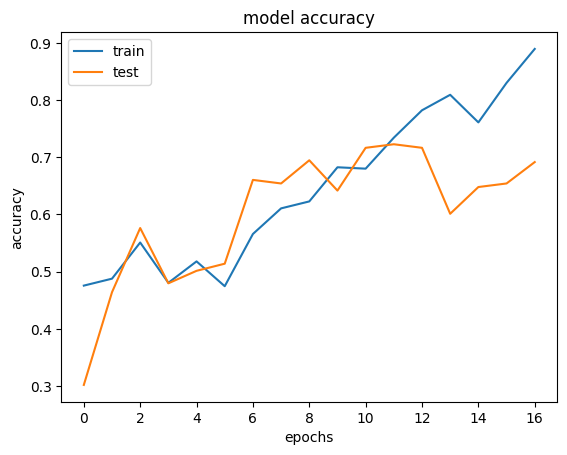

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show();

- The model appears to be overfitting. We will use dropout regularization method in the next model

In [26]:
model.evaluate(X_test, (y_test_e))

35/35 [==============================] - 0s 10ms/step - loss: 176.1479 - accuracy: 0.6197


[176.14788818359375, 0.619744062423706]

Since we have converted the target variable into a NumPy array using labelbinarizer, now we are converting the target variable into its original form by using the numpy. argmax() function which returns indices of the max element of the array in a particular axis and this original form of target will be used in calculating the accuracy, and plotting the confusion matrix.

In [27]:
#Test Prediction
y_test_pred_ln = model.predict(X_test)
y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis =1)
normal_y_test = np.argmax(y_test_e, axis = 1)

35/35 [==============================] - 0s 9ms/step


In [29]:
#Test Accuracy
accuracy_score((normal_y_test), y_test_pred_classes_ln)

0.6197440585009141

- The model is giving about 62% accuracy score on the test data.

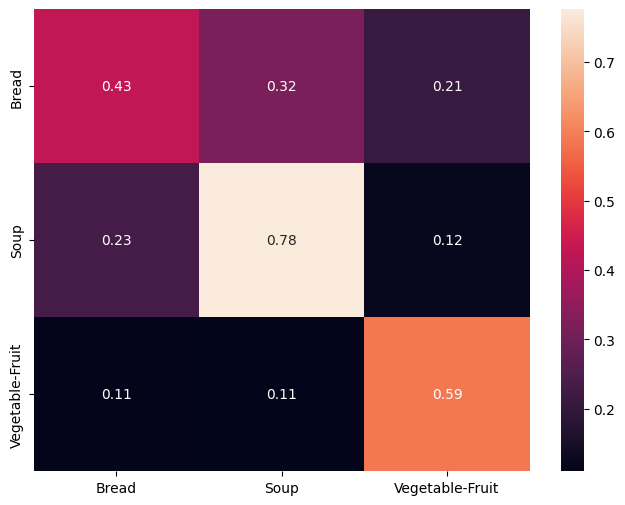

In [31]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln)
#Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis =1)
plt.figure(figsize = (8,6))
sns.heatmap(cf_matrix_n1, xticklabels = CATEGORIES, yticklabels = CATEGORIES, annot = True);

**Model 2: Add more layers to the initial CNN model**

In [32]:
backend.clear_session()
#Setting the seed fro random number generators to receive the same output
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [46]:
model1 = Sequential()

#Inital Convolution layer with 256 kerneks of size 5 by 5, padding enabled
model1.add(Conv2D(filters = 256, kernel_size = (5,5), padding ='Same', activation = 'relu', input_shape = (150,150,3)))
model1.add(MaxPool2D(pool_size=(2,2)))

#Second convolution layer with max pooling and use of strides
model1.add(Conv2D(filters = 128, kernel_size = (5,5), padding ='Same', activation = 'relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

#Third convolution layer with 64 filters and dropout
model1.add(Conv2D(filters = 64, kernel_size = (3,3), padding ='Same', activation = 'relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
#Adding 30% dropout to reduce overfitting
model1.add(Dropout(0.3))

#Fourth convolution layer
model1.add(Conv2D(filters = 32, kernel_size = (3,3), padding ='Same', activation = 'relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
#Adding 30% dropout to reduce overfitting
model1.add(Dropout(0.3))

#Flattedning the 3D layer into 1D inr eadiness for the ANN layers
model1.add(Flatten())

#Add the first fully connected ANN layer
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.5))

#Add second ANN layer with dropout
model1.add(Dense(32, activation = 'relu'))
model1.add(Dropout(0.5))

#Output layer definition
model1.add(Dense(3, activation = 'softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 38, 38, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 19, 19, 32)       

As we can see from the above summary, this CNN model will train and learn **1,185,107 parameters (weights and biases).**

In [48]:
optimizer = Adam(lr = 0.001)
model1.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor = 'val_loss', mode= 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose =1, save_best_only = True)

#Fitting the model with 30 epochs and validation split as 10%
history = model1.fit(X_train, y_train_e, epochs = 30, batch_size = 32, validation_split = 0.10, callbacks=[es, mc], use_multiprocessing= True)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.0935 - accuracy: 0.4251
Epoch 1: val_accuracy improved from -inf to 0.46417, saving model to best_model.h5
91/91 [==============================] - 32s 194ms/step - loss: 1.0935 - accuracy: 0.4251 - val_loss: 1.0680 - val_accuracy: 0.4642
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


91/91 [==============================] - ETA: 0s - loss: 1.0596 - accuracy: 0.4615
Epoch 2: val_accuracy did not improve from 0.46417
91/91 [==============================] - 15s 169ms/step - loss: 1.0596 - accuracy: 0.4615 - val_loss: 1.0679 - val_accuracy: 0.4642
Epoch 3/30
90/91 [============================>.] - ETA: 0s - loss: 1.0186 - accuracy: 0.4917
Epoch 3: val_accuracy improved from 0.46417 to 0.51090, saving model to best_model.h5
91/91 [==============================] - 15s 169ms/step - loss: 1.0188 - accuracy: 0.4917 - val_loss: 1.0298 - val_accuracy: 0.5109
Epoch 4/30
90/91 [============================>.] - ETA: 0s - loss: 1.0324 - accuracy: 0.4993
Epoch 4: val_accuracy improved from 0.51090 to 0.55763, saving model to best_model.h5
91/91 [==============================] - 14s 159ms/step - loss: 1.0325 - accuracy: 0.4993 - val_loss: 0.9315 - val_accuracy: 0.5576
Epoch 5/30
90/91 [============================>.] - ETA: 0s - loss: 0.8721 - accuracy: 0.5799
Epoch 5: val_acc

**Plot the accuracy vs epochs curve**

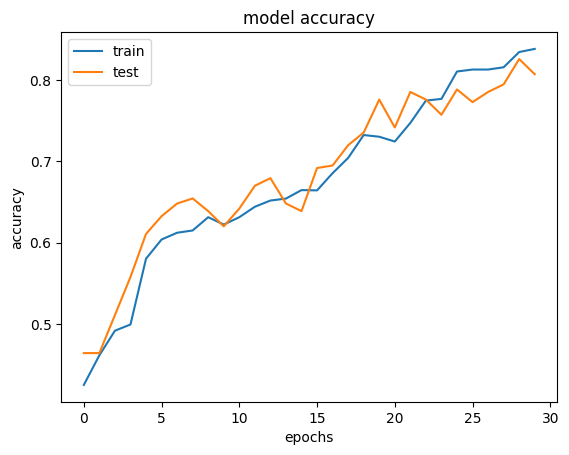

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show();

In [51]:
model1.evaluate(X_test, (y_test_e))

35/35 [==============================] - 2s 62ms/step - loss: 118.5278 - accuracy: 0.5740


[118.52775573730469, 0.5740402340888977]

In [52]:
#Test Prediction
y_test_pred_ln1 = model1.predict(X_test)
y_test_pred_classes_ln1 = np.argmax(y_test_pred_ln1, axis =1)

35/35 [==============================] - 1s 33ms/step


In [53]:
#Test Accuracy
accuracy_score((normal_y_test), y_test_pred_classes_ln1)

0.5740402193784278

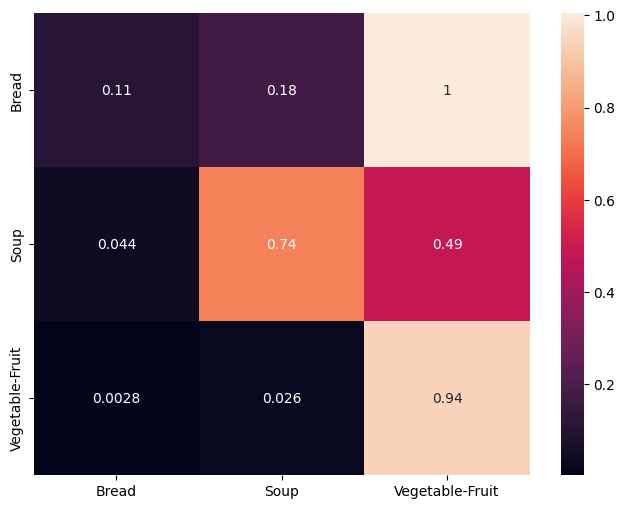

In [54]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln1)
#Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis =1)
plt.figure(figsize = (8,6))
sns.heatmap(cf_matrix_n1, xticklabels = CATEGORIES, yticklabels = CATEGORIES, annot = True);

## Model Comparison

**Model 1**

In [58]:
print(classification_report((normal_y_test), y_test_pred_classes_ln))

              precision    recall  f1-score   support

           0       0.55      0.43      0.48       362
           1       0.64      0.78      0.70       500
           2       0.64      0.59      0.61       232

    accuracy                           0.62      1094
   macro avg       0.61      0.60      0.60      1094
weighted avg       0.61      0.62      0.61      1094



In [59]:
print(classification_report((normal_y_test), y_test_pred_classes_ln1))

              precision    recall  f1-score   support

           0       0.70      0.11      0.19       362
           1       0.78      0.74      0.76       500
           2       0.39      0.94      0.55       232

    accuracy                           0.57      1094
   macro avg       0.62      0.60      0.50      1094
weighted avg       0.67      0.57      0.53      1094



##**Predictions**

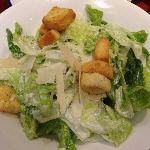

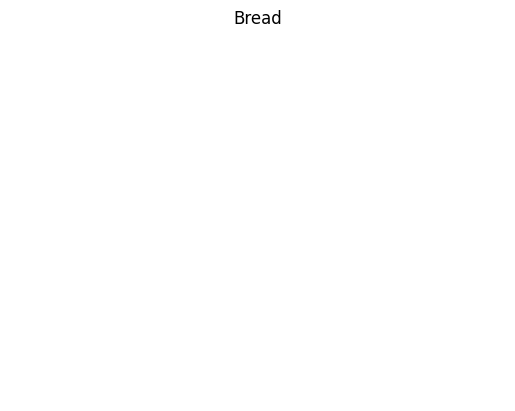

In [61]:
#Plotting the test image
cv2_imshow(X_test[1])
i =y_test.Label[1]
i = np.argmax(i)
if(i ==0):
  plt.title('Bread')

if(i ==1):
  plt.title('Soup')

if(i ==2):
  plt.title('Vegetable-Fruit')

plt.axis('off')
plt.show();

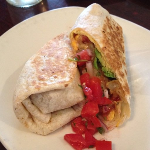

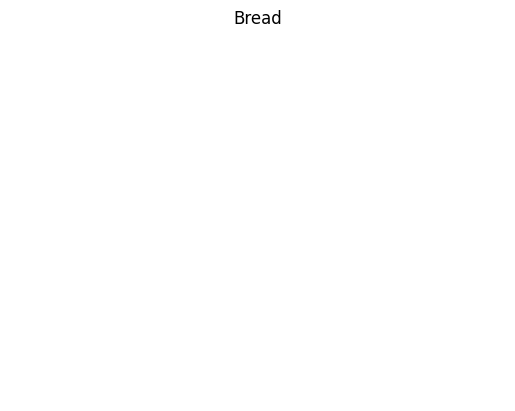

In [71]:
#Plotting the test image
cv2_imshow(X_test[95])
i =y_test.Label[95]
i = np.argmax(i)
if(i ==0):
  plt.title('Bread')
if(i ==1):
  plt.title('Soup')
if(i ==2):
  plt.title('Vegetable-Fruit')

plt.axis('off')
plt.show();

In [69]:
#Predicting the test image with the best model and store in a res variable
res = model.predict(X_test[1].reshape(1,150,150,3))

#Applying the argmax on the prediction to get the highet index value
i = np.argmax(res)
if(i ==0):
  print('Bread')
if(i ==1):
  print('Soup')
if(i ==2):
  print('Vegetable-Fruit')

1/1 [==============================] - 0s 134ms/step
Bread


In [72]:
#Predicting the test image with the best model and store in a res variable
res = model.predict(X_test[95].reshape(1,150,150,3))

#Applying the argmax on the prediction to get the highet index value
i = np.argmax(res)
if(i ==0):
  print('Bread')
if(i ==1):
  print('Soup')
if(i ==2):
  print('Vegetable-Fruit')

1/1 [==============================] - 0s 19ms/step
Vegetable-Fruit


### **Conclusion**

1. As we have seen, the CNN model - 1 was able to predict the test image correctly with a test accuracy of 62%.

2. **There is still scope for improvement in the test accuracy of the CNN model** chosen here. **Different architectures** and **optimizers** can be used to built to obtain a better food classifier.

3. Transfer learning (Which will be covered in the next week) can be applied to the dataset to improve the accuracy.

4. Once the desired performance is achieved from the model, the company can use it to classify different images being uploaded to the website.